In [108]:
import pandas as pd                                  # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier   # 기계학습 관련 모듈
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# from sklearnex import patch_sklearn
# patch_sklearn()

In [90]:
file_data = '../DATA/winequality-white.csv'

In [91]:
whitewineDF = pd.read_csv(file_data, sep = ';')
whitewineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [92]:
whitewineDF.shape

(4898, 12)

In [93]:
whitewineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


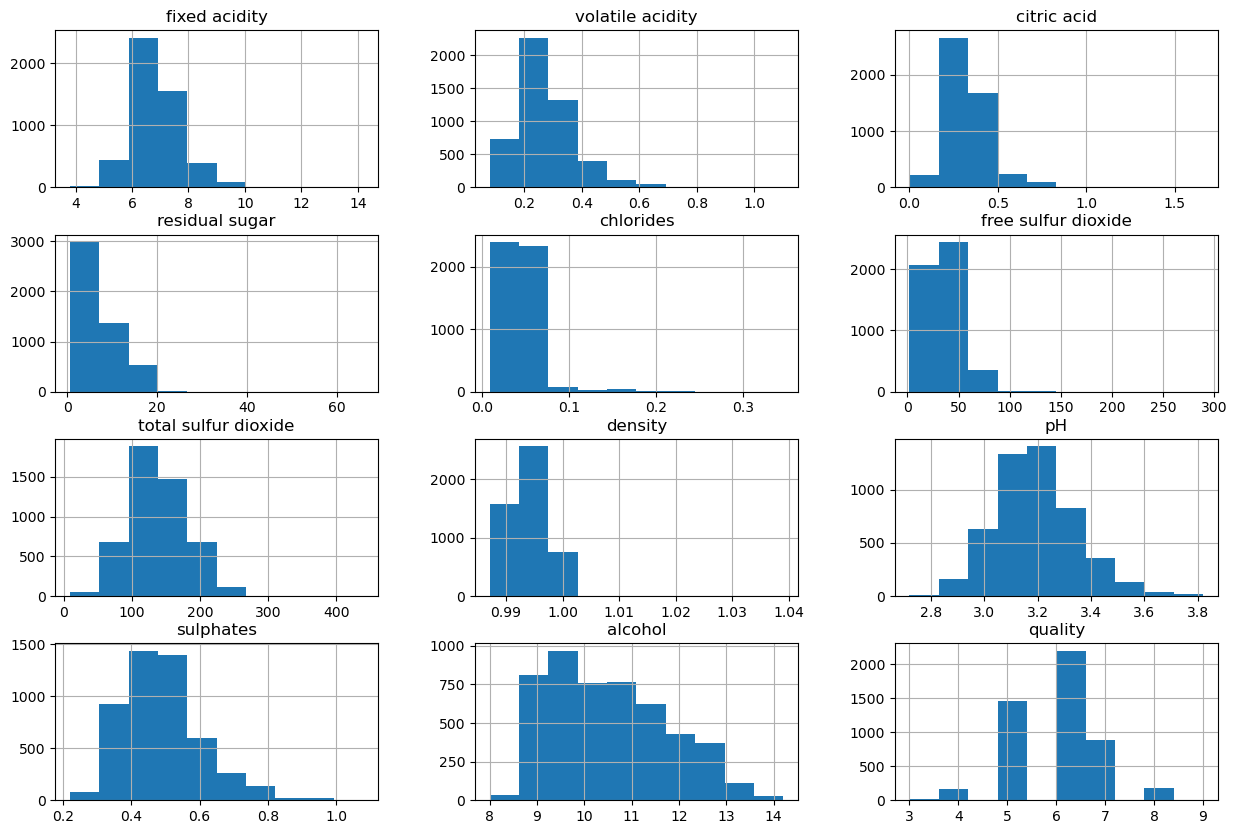

In [94]:
whitewineDF.hist(figsize = (15, 10))
plt.show()

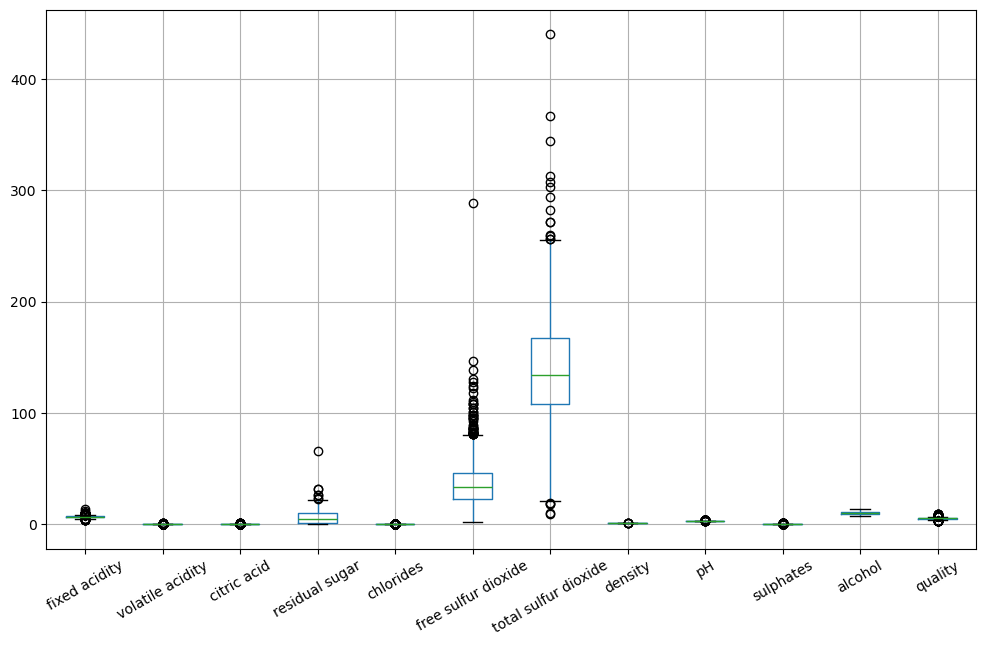

In [95]:
whitewineDF.boxplot(figsize = (12, 7), rot = 30)
plt.show()

In [96]:
# Z-scroe 기반 이상치 탐지 함수
def find_outlier(column_list, scale = 3, df = whitewineDF):
    for col in column_list:
        mean_value = df[col].mean()
        std_value = df[col].std()
        
        base = scale
        z_data = (df[col] - mean_value) / std_value
        mask = z_data.abs() > scale
        print(f'{col} 특성의 이상치 개수 : {z_data[mask].count()}개\n')

In [97]:
find_outlier(whitewineDF.columns, 3)

fixed acidity 특성의 이상치 개수 : 0개
volatile acidity 특성의 이상치 개수 : 2371개
citric acid 특성의 이상치 개수 : 1780개
residual sugar 특성의 이상치 개수 : 0개
chlorides 특성의 이상치 개수 : 4001개
free sulfur dioxide 특성의 이상치 개수 : 0개
total sulfur dioxide 특성의 이상치 개수 : 0개
density 특성의 이상치 개수 : 1727개
pH 특성의 이상치 개수 : 13개
sulphates 특성의 이상치 개수 : 1874개
alcohol 특성의 이상치 개수 : 0개
quality 특성의 이상치 개수 : 0개


In [98]:
# 사분위수 기반 이상치 탐지 함수
def find_outlier2(column_list, scale = 1.5, df = whitewineDF):
    for col in column_list:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        # 이상치로 판단할 기준이 되는 값
        lower = q1 - scale*iqr
        upper = q3 + scale*iqr
        mask = (df[col] < lower) | (df[col] > upper) 
        
        print(f'{col} 특성의 이상치 개수 : {df[col][mask].count()}개\n')

In [99]:
find_outlier2(whitewineDF.columns)

fixed acidity 특성의 이상치 개수 : 119개
volatile acidity 특성의 이상치 개수 : 186개
citric acid 특성의 이상치 개수 : 270개
residual sugar 특성의 이상치 개수 : 7개
chlorides 특성의 이상치 개수 : 208개
free sulfur dioxide 특성의 이상치 개수 : 50개
total sulfur dioxide 특성의 이상치 개수 : 19개
density 특성의 이상치 개수 : 5개
pH 특성의 이상치 개수 : 75개
sulphates 특성의 이상치 개수 : 124개
alcohol 특성의 이상치 개수 : 0개
quality 특성의 이상치 개수 : 200개


In [100]:
# 이상치 제거 전 상관계수
whitewineDF.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [101]:
def print_feature(nrows, ncols, df, target, features, corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx + 1)
        plt.scatter(df[target], df[features[idx]], label = f'corr : {corrs[idx]:.2}', color = 'cornflowerblue')
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.legend()
    plt.tight_layout()
    plt.show()

In [102]:
corrList = whitewineDF.corr(numeric_only = True)['quality'].to_list()
corrList[:-1]

[-0.11366283071301829,
 -0.19472296892113433,
 -0.009209090883975582,
 -0.0975768288946934,
 -0.2099344109467597,
 0.008158067123435956,
 -0.1747372175970627,
 -0.3071233127347341,
 0.09942724573666441,
 0.05367787713279206,
 0.4355747154613733]

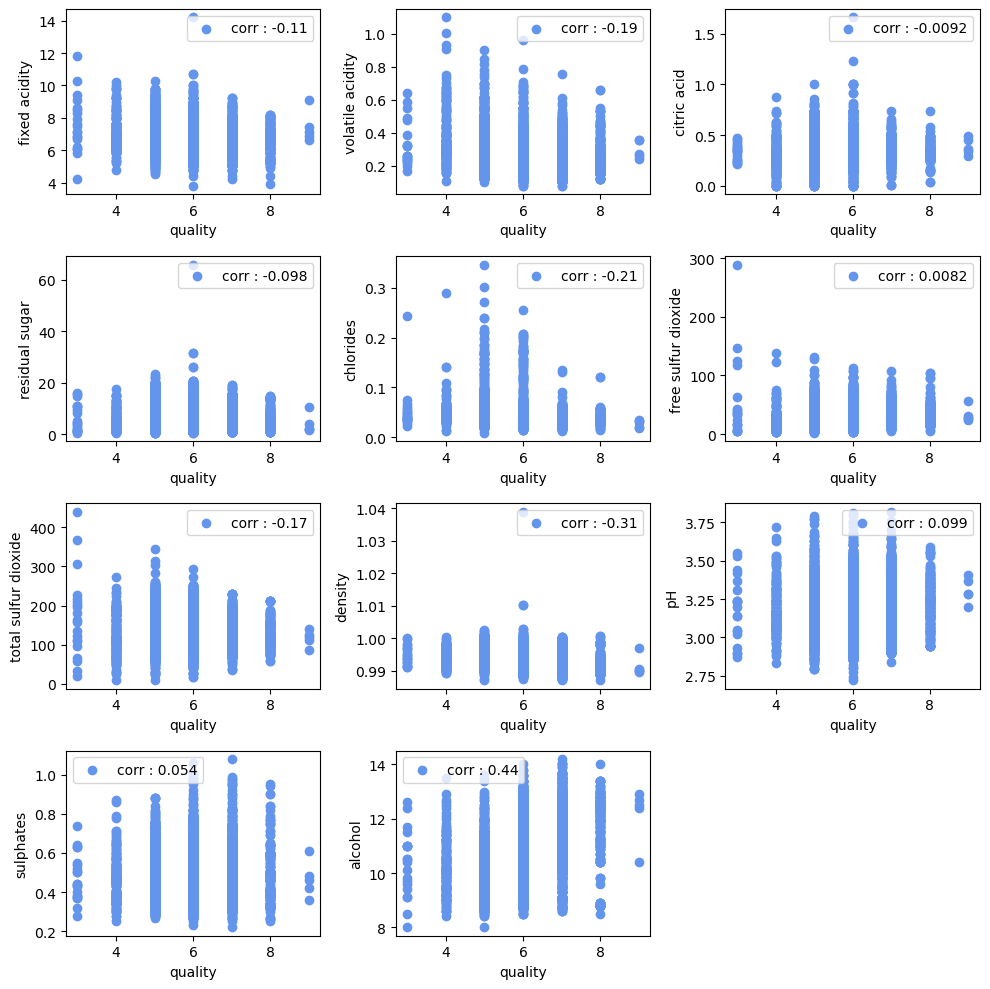

In [103]:
plt.figure(figsize = (10, 10))
print_feature(4, 3, whitewineDF, 'quality', whitewineDF.columns[:-1], corrList[:-1])

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)
plt.show()

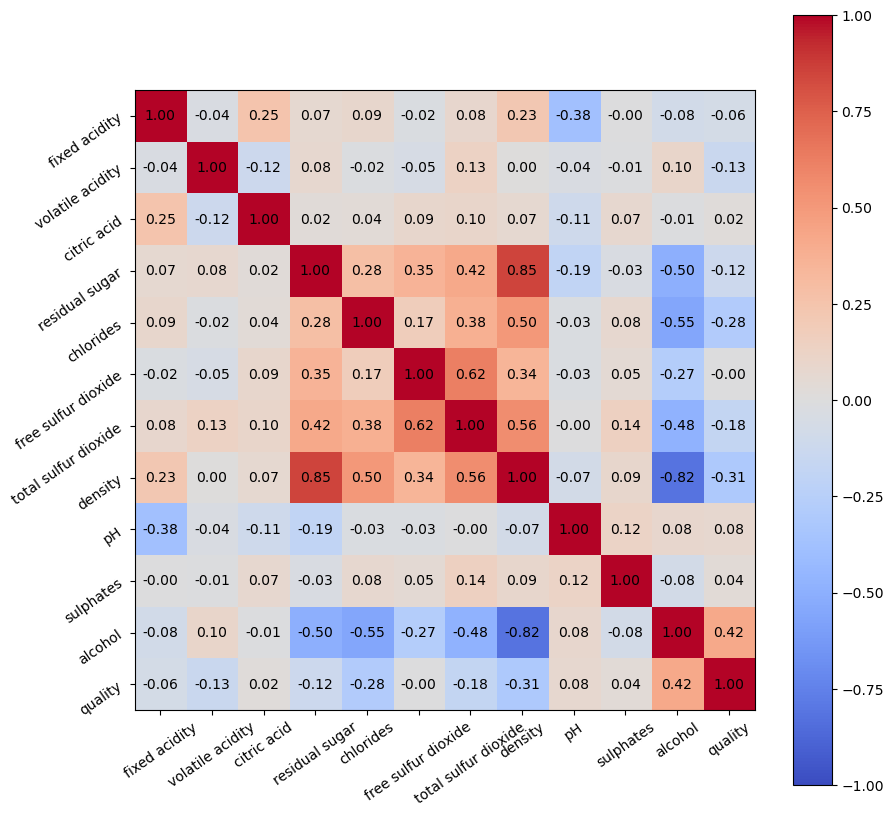

In [112]:
# 상관관계 계산
corr_matrix = whitewineDF.corr()

plt.figure(figsize = (10, 10))
# 히트맵으로 상관계수 표시
plt.imshow(corr_matrix, cmap = 'coolwarm', vmin = -1, vmax = 1)

# x축, y축 눈금 설정
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation = 35)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation = 35)

# 주석 추가
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = f'{corr_matrix.iloc[i, j]:.2f}'
        plt.annotate(text, xy = (j, i), ha = 'center', va = 'center')

# 컬러바 추가
plt.colorbar()

plt.show()

#### 이상치 제거

In [105]:
# 사분위수 기반 이상치 제거 함수
def delete_outlier(column_list, scale = 1.5, df = whitewineDF):
    del_index_list = []
    for column in column_list:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - scale*iqr
        upper = q3 + scale*iqr
        mask = (df[column] > upper) | (df[column] < lower)
        index_list = list(df[mask].index)
        del_index_list += index_list
    
    del_index_list = list(set(del_index_list))
    df = df.drop(del_index_list)
    df.reset_index(drop = True, inplace = True)

    return df

In [106]:
whitewineDF = delete_outlier(whitewineDF.columns)

In [107]:
whitewineDF.shape

(3858, 12)

### 참고) pd.read_csv()의 sep 매개변수 사용하지 않고 데이터 정리 <hr>

In [ ]:
df = pd.read_csv(file_data)
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [ ]:
df.shape

(4898, 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  4898 non-null   object
dtypes: object(1)
memory usage: 38.4+ KB


In [ ]:
df.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

In [ ]:
# 피처 이름 수정

feature_list = []
for feature in df.columns[0].split(';'):
    feature_list.append(feature.replace('"', ''))

In [ ]:
feature_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
df.loc[0].values

array(['7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6'], dtype=object)

In [ ]:
list(df.loc[0].values)[0].split(';')

['7',
 '0.27',
 '0.36',
 '20.7',
 '0.045',
 '45',
 '170',
 '1.001',
 '3',
 '0.45',
 '8.8',
 '6']

In [ ]:
list(map(float, list(df.loc[0].values)[0].split(';')))

[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8, 6.0]

In [ ]:
wine_data = []
for ind in range(df.shape[0]):
    data = df.loc[ind].values
    wine_data.append(list(map(float, list(data)[0].split(';'))))

In [ ]:
wine_data

[[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8, 6.0],
 [6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5, 6.0],
 [8.1, 0.28, 0.4, 6.9, 0.05, 30.0, 97.0, 0.9951, 3.26, 0.44, 10.1, 6.0],
 [7.2, 0.23, 0.32, 8.5, 0.058, 47.0, 186.0, 0.9956, 3.19, 0.4, 9.9, 6.0],
 [7.2, 0.23, 0.32, 8.5, 0.058, 47.0, 186.0, 0.9956, 3.19, 0.4, 9.9, 6.0],
 [8.1, 0.28, 0.4, 6.9, 0.05, 30.0, 97.0, 0.9951, 3.26, 0.44, 10.1, 6.0],
 [6.2, 0.32, 0.16, 7.0, 0.045, 30.0, 136.0, 0.9949, 3.18, 0.47, 9.6, 6.0],
 [7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8, 6.0],
 [6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5, 6.0],
 [8.1, 0.22, 0.43, 1.5, 0.044, 28.0, 129.0, 0.9938, 3.22, 0.45, 11.0, 6.0],
 [8.1, 0.27, 0.41, 1.45, 0.033, 11.0, 63.0, 0.9908, 2.99, 0.56, 12.0, 5.0],
 [8.6, 0.23, 0.4, 4.2, 0.035, 17.0, 109.0, 0.9947, 3.14, 0.53, 9.7, 5.0],
 [7.9, 0.18, 0.37, 1.2, 0.04, 16.0, 75.0, 0.992, 3.18, 0.63, 10.8, 5.0],
 [6.6, 0.16, 0.4, 1.5, 0.044, 48.0, 143.

In [ ]:
white_wineDF = pd.DataFrame(data = wine_data, columns = feature_list)
white_wineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [ ]:
white_wineDF.shape

(4898, 12)

In [ ]:
white_wineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [ ]:
white_wineDF.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
white_wineDF['quality'].unique()

array([6., 5., 7., 8., 4., 3., 9.])

In [ ]:
white_wineDF['quality'].value_counts().sort_index()

quality
3.0      20
4.0     163
5.0    1457
6.0    2198
7.0     880
8.0     175
9.0       5
Name: count, dtype: int64

In [ ]:
white_wineDF['quality'] = white_wineDF['quality'].astype('int64')

In [ ]:
white_wineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
white_wineDF.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [ ]:
featureDF = white_wineDF['alcohol']
targetDF = white_wineDF['quality']

In [ ]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    test_size = 0.2,
                                                    stratify = targetDF)

In [ ]:
# 모듈로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
# 훈련을 위해 시리즈를 데이터프레임으로 변환
X_train = X_train.to_frame()
X_test = X_test.to_frame()

#### KNN 알고리즘

In [ ]:
max_k = 50

train_scoreList = []
test_scoreList = []
for k in range(1, max_k + 1):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    train_scoreList.append(model.score(X_train, y_train))
    test_scoreList.append(model.score(X_test, y_test))

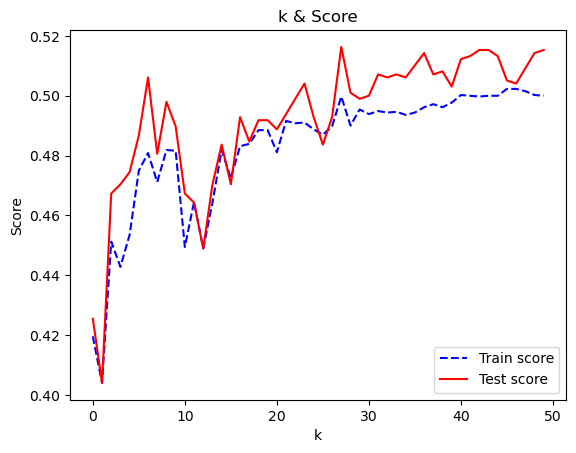

In [ ]:
# k에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'b--', label = 'Train score')
plt.plot(test_scoreList, 'r', label = 'Test score')
plt.title('k & Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.show()

### 피처 2개 <hr>

In [ ]:
white_wineDF['quality'].value_counts().sort_index()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

In [ ]:
white_wineDF['quality']

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [ ]:
white_wineDF['new_quality'] = white_wineDF['quality'].replace({3 : 1, 4 : 1, 5 : 2, 6 : 2, 7 : 2, 8 : 3, 9 : 3})

In [ ]:
white_wineDF['new_quality'].unique()

array([2, 3, 1], dtype=int64)

In [ ]:
featureDF = white_wineDF[['density', 'alcohol', 'new_quality']]
targetDF = white_wineDF['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    test_size = 0.2,
                                                    stratify = targetDF)

In [ ]:
featureDF

,density,alcohol,new_quality
0,1.00100,8.8,2
1,0.99400,9.5,2
2,0.99510,10.1,2
3,0.99560,9.9,2
4,0.99560,9.9,2
...,...,...,...
4893,0.99114,11.2,2
4894,0.99490,9.6,2
4895,0.99254,9.4,2
4896,0.98869,12.8,2


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
# 학습용 데이터 피처 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(3918, 3)

In [ ]:
# 테스트용 데이터 피처 스케일링
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(980, 3)

#### KNN 알고리즘 

In [ ]:
max_k = 50

train_scoreList = []
test_scoreList = []
for k in range(1, max_k + 1):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(scaled_X_train, y_train)
    train_scoreList.append(model.score(scaled_X_train, y_train))
    test_scoreList.append(model.score(scaled_X_test, y_test))

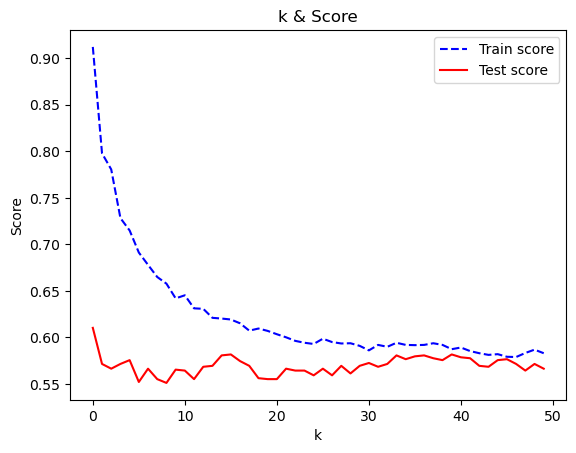

In [ ]:
# k에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'b--', label = 'Train score')
plt.plot(test_scoreList, 'r', label = 'Test score')
plt.title('k & Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
wineModel = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
wineModel.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
wineModel.score(scaled_X_train, y_train), wineModel.score(scaled_X_test, y_test)

(0.9122001020929046, 0.610204081632653)

In [ ]:
sum(wineModel.predict(scaled_X_test) == y_test) / len(y_test)

0.610204081632653

In [ ]:
wineModel3.score(scaled_X_train, y_train), wineModel3.score(scaled_X_test, y_test)

(0.5712098009188361, 0.5724489795918367)

In [ ]:
sum(wineModel3.predict(scaled_X_test) == y_test) / len(y_test)

0.5724489795918367

In [ ]:
def findoptimal(attri1, attri2, my_model, my_scaler, test_size = 0.2, max_k = 50):
    
    file_data = '../DATA/winequality-white.csv'
    white_wineDF = pd.read_csv(file_data, sep = ';')
    white_wineDF['quality'] = white_wineDF['quality'].astype('int64')
    white_wineDF['new_quality'] = white_wineDF['quality'].replace({3 : 1, 4 : 1, 5 : 2, 6 : 2, 7 : 2, 8 : 3, 9 : 3})
    featureDF = white_wineDF[[attri1, attri2, 'new_quality']]
    targetDF = white_wineDF['quality']
    X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    test_size = test_size,
                                                    stratify = targetDF,
                                                    random_state = 42)
    scaler = my_scaler
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    if my_model.__class__ == KNeighborsClassifier:
        train_scoreList = []
        test_scoreList = []
        for k in range(1, max_k + 1):
            model = KNeighborsClassifier(n_neighbors = k)
            model.fit(scaled_X_train, y_train)
            train_scoreList.append(model.score(scaled_X_train, y_train))
            test_scoreList.append(model.score(scaled_X_test, y_test))
        
        # k에 따른 학습용/테스트용 점수 시각화
        # plt.plot(train_scoreList, 'b--', label = 'Train score')
        # plt.plot(test_scoreList, 'r', label = 'Test score')
        # plt.title('k & Score')
        # plt.xlabel('k')
        # plt.ylabel('Score')
        # plt.legend()
        # plt.show()

        print(f'피처가 {attri1}과 {attri2}일 때 최적의 이웃 개수 k = {test_scoreList.index(max(test_scoreList))+1}')
        model = KNeighborsClassifier(n_neighbors = test_scoreList.index(max(test_scoreList))+1)
        model.fit(scaled_X_train, y_train)
        return round(model.score(scaled_X_train, y_train), 2), round(model.score(scaled_X_test, y_test), 2)
        #print(f'train score는 k = {train_scoreList.index(max(train_scoreList))+1}일 때 최댓값 {max(train_scoreList)}을 갖는다.')
        #print(f'test score는 k = {test_scoreList.index(max(test_scoreList))+1}일 때 최댓값 {max(test_scoreList)}을 갖는다.')
    else:   
        my_model.fit(scaled_X_train, y_train)
        return round(my_model.score(scaled_X_train, y_train), 2), round(my_model.score(scaled_X_test, y_test), 2)

In [ ]:
my = KNeighborsClassifier()
my.__class__

sklearn.neighbors._classification.KNeighborsClassifier

In [ ]:
my.__class__ == KNeighborsClassifier

True

In [ ]:
findoptimal('density', 'alcohol', KNeighborsClassifier(), StandardScaler())

피처가 density과 alcohol일 때 최적의 이웃 개수 k = 1


(0.9101582440020418, 0.6316326530612245)

In [ ]:
file_data = '../DATA/winequality-white.csv'
white_wineDF = pd.read_csv(file_data, sep = ';')
combinations(white_wineDF.columns, 2)

In [ ]:
for ind in combinations(white_wineDF.columns[:-1], 2):
    print(ind)

('fixed acidity', 'volatile acidity')
('fixed acidity', 'citric acid')
('fixed acidity', 'residual sugar')
('fixed acidity', 'chlorides')
('fixed acidity', 'free sulfur dioxide')
('fixed acidity', 'total sulfur dioxide')
('fixed acidity', 'density')
('fixed acidity', 'pH')
('fixed acidity', 'sulphates')
('fixed acidity', 'alcohol')
('volatile acidity', 'citric acid')
('volatile acidity', 'residual sugar')
('volatile acidity', 'chlorides')
('volatile acidity', 'free sulfur dioxide')
('volatile acidity', 'total sulfur dioxide')
('volatile acidity', 'density')
('volatile acidity', 'pH')
('volatile acidity', 'sulphates')
('volatile acidity', 'alcohol')
('citric acid', 'residual sugar')
('citric acid', 'chlorides')
('citric acid', 'free sulfur dioxide')
('citric acid', 'total sulfur dioxide')
('citric acid', 'density')
('citric acid', 'pH')
('citric acid', 'sulphates')
('citric acid', 'alcohol')
('residual sugar', 'chlorides')
('residual sugar', 'free sulfur dioxide')
('residual sugar', 'to

In [ ]:
list(combinations(white_wineDF.columns, 2))[0]

('fixed acidity', 'volatile acidity')

In [ ]:
train_scoreList = []
test_scoreList = []
def main(my_model, my_scaler, test_size = 0.2, max_k = 50):
    
    file_data = '../DATA/winequality-white.csv'
    white_wineDF = pd.read_csv(file_data, sep = ';')
    pair_list = list(combinations(white_wineDF.columns[:-1], 2))
    for pair in pair_list:
        train_scoreList.append(findoptimal(pair[0], pair[1], my_model, my_scaler, test_size = test_size, max_k = max_k)[0])
        test_scoreList.append(findoptimal(pair[0], pair[1], my_model, my_scaler, test_size = test_size, max_k = max_k)[1])

    print(pair_list[train_scoreList.index(max(train_scoreList))], round(max(train_scoreList), 2))
    print(pair_list[test_scoreList.index(max(test_scoreList))], round(max(test_scoreList), 2))

In [ ]:
main(KNeighborsClassifier(), StandardScaler())

최적의 이웃 개수 k = 42
최적의 이웃 개수 k = 34
최적의 이웃 개수 k = 29
최적의 이웃 개수 k = 23
최적의 이웃 개수 k = 49
최적의 이웃 개수 k = 1
최적의 이웃 개수 k = 21
최적의 이웃 개수 k = 46
최적의 이웃 개수 k = 4
최적의 이웃 개수 k = 32
최적의 이웃 개수 k = 1


KeyboardInterrupt: 